## Client: No-Churn Telecom | Category: Telecom – Churn Rate ML
### Project Ref: PM-PR-0017

### Project Member's Name:
Mohamed Shafeeq VP

Loh Xiao Tong

Sonali Kundu

In [1]:
!pip install sqlalchemy
!pip install pymysql

In [1]:
from sqlalchemy import create_engine
import pandas as pd

## Business Case:
No-Churn Telecom is an established Telecom operator in Europe with more than a decade in Business. Due to new players in the market, telecom industry has become very competitive and retaining customers becoming a challenge. In spite of No-Churn initiatives of reducing tariffs and promoting more offers, the churn rate ( percentage of customers migrating to competitors) is well above 10%. No-Churn wants to explore possibility of Machine Learning to help with following use cases to retain competitive edge in the industry.

Due to the direct effect on the revenues of the companies, especially in the telecom field, companies are seeking to develop means to predict potential customer to churn.

## PROJECT GOAL
Help No-Churn with their use cases with ML

1. Understanding the variables that are influencing the customers to migrate.

2. Creating Churn risk scores that can be indicative to drive retention campaigns.

3. Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers help to identify possible CHURN-FLAG YES customers and provide more attention in customer touch point areas, including customer care support, request fulfilment, auto categorizing tickets as high priority for quick resolutions any questions they may have etc.

It is a classification problem and true represents churn and false represents not churn, false-positive represents the who is predicted as churn but will not change the operator (no financial penalty), false-negative repe resent the customer who is quite a based on predicted as not churn but they will churn(financial penalty).

### Load The Dataset

In [2]:
db_host = '18.136.157.135:3306' # port: 3306
username = 'dm_team3'
user_pass = 'DM!$!Team!27@9!20&'
db_name = 'project_telecom'

conn = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)
conn.table_names()

['telecom_churn_data']

In [3]:
query = "select * from telecom_churn_data" # SQL statement
churn_data = pd.read_sql(query,conn)
print(churn_data.shape)
churn_data

(4617, 21)


,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   columns1   4617 non-null   object
 1   columns2   4617 non-null   object
 2   columns3   4617 non-null   object
 3   columns4   4617 non-null   object
 4   columns5   4617 non-null   object
 5   columns6   4617 non-null   object
 6   columns7   4617 non-null   object
 7   columns8   4617 non-null   object
 8   columns9   4617 non-null   object
 9   columns10  4617 non-null   object
 10  columns11  4617 non-null   object
 11  columns12  4617 non-null   object
 12  columns13  4617 non-null   object
 13  columns14  4617 non-null   object
 14  columns15  4617 non-null   object
 15  columns16  4617 non-null   object
 16  columns17  4617 non-null   object
 17  columns18  4617 non-null   object
 18  columns19  4617 non-null   object
 19  columns20  4617 non-null   object
 20  columns21  4617 non-null   obj

In [4]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

## Business case:- 
No-Churn Telecom is an established Telecom operator in Europe
with more than a decade in Business. Due to new players in the
market, telecom industry has become very competitive and
retaining customers becoming a challenge.
In spite of No-Churn initiatives of reducing tariffs and promoting
more offers, the churn rate ( percentage of customers migrating to
competitors) is well above 10%.
No-Churn wants to explore possibility of Machine Learning to help
with following use cases to retain competitive edge in the industry.

#### Binary classification

## PROJECT GOAL
Help No-Churn with their use cases with ML

1.Understanding the variables that are influencing the customers
to migrate.

2.Creating Churn risk scores that can be indicative to drive
retention campaigns.

3.Introduce new predicting variable “CHURN-FLAG” with values
YES(1) or NO(0) so that email campaigns with lucrative offers
can be targeted to Churn YES customers.

## Basic Checks

In [5]:
churn_data.columns

Index(['columns1', 'columns2', 'columns3', 'columns4', 'columns5', 'columns6',
       'columns7', 'columns8', 'columns9', 'columns10', 'columns11',
       'columns12', 'columns13', 'columns14', 'columns15', 'columns16',
       'columns17', 'columns18', 'columns19', 'columns20', 'columns21'],
      dtype='object')

In [5]:
## Renaming columns just to make analysis easy
churn_data.rename(columns={'columns1':'State','columns2':'Account_Length','columns3':'Area_Code', 'columns4':'Phone',
                         'columns5':'International_Plan','columns6':'VMail_Plan','columns7':'VMail_Message',
                           'columns8':'Day_Mins', 'columns9':'Day_Calls','columns10':'Day_Charge',
                           'columns11':'Eve_Mins','columns12':'Eve_Calls','columns13':'Eve_Charge','columns14':'Night_Mins',
                           'columns15':'Night_Calls','columns16':'Night_Charge','columns17':'International_Mins',
                           'columns18':'International_calls','columns19':'International_Charge',
                           'columns20':'CustServ_Calls','columns21':'Churn' }
            ,inplace=True)

In [6]:
churn_data['Churn_Flag'] = churn_data.Churn
churn_data.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn,Churn_Flag
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10,3,2.7,1,False.,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.7,1,False.,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.3,162.6,104,7.32,12.2,5,3.29,0,False.,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,False.


In [7]:
churn_data.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [13]:
churn_data.tail(7)

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
4610,NM,138,408,419-8866,no,no,0,63.7,114,10.83,...,132,18.04,247.6,114,11.14,8.8,4,2.38,0,False.
4611,HI,90,408,342-3593,no,no,0,193.8,90,32.95,...,98,17.56,153.3,120,6.9,10.1,9,2.73,3,False.
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4616,IN,140,415,409-6884,no,no,0,204.7,100,34.8,...,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


In [38]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account_Length        4617 non-null   object
 2   Area_Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International_Plan    4617 non-null   object
 5   VMail_Plan            4617 non-null   object
 6   VMail_Message         4617 non-null   object
 7   Day_Mins              4617 non-null   object
 8   Day_Calls             4617 non-null   object
 9   Day_Charge            4617 non-null   object
 10  Eve_Mins              4617 non-null   object
 11  Eve_Calls             4617 non-null   object
 12  Eve_Charge            4617 non-null   object
 13  Night_Mins            4617 non-null   object
 14  Night_Calls           4617 non-null   object
 15  Night_Charge          4617 non-null   

In [15]:
churn_data.describe()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
count,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,...,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617
unique,51,218,3,4617,2,2,47,1901,123,1901,...,125,1621,1813,130,1012,168,21,168,10,2
top,WV,90,415,364-9240,no,no,0,154,102,26.18,...,105,14.25,186.2,105,9.66,9.8,3,3,1,False.
freq,149,63,2299,1,4171,3381,3381,10,108,10,...,111,15,10,115,19,81,925,81,1651,3961


## Domain Analysis

   State    : the US state in which the customer resides, indicated by a two-letter abbreviation; for example, OH or NJ  
   
   Account_Length : the number of days that this account has been active
   
   Area_Code :the three-digit area code of the corresponding customer’s phone number
   
   Phone      :the remaining seven-digit phone number
   
   International_Plan :whether the customer has an international calling plan: yes/no
   
   VMail_Plan :   whether the customer has a voice mail feature: yes/no
   
   VMail_Message:presumably the average number of voice mail messages per month      
   Day_Mins :the total number of calling minutes used during the day
   
   Day_Calls :   the total number of calls placed during the day
   
   Day_Charge :   the billed cost of daytime calls
   
   Eve_Mins :    the total number of calling minutes used during the evening 
   
   Eve_Calls :  the total number of calls placed during the evening
   
   Eve_Charge  : the billed cost for calls placed during the evening
   
   Night_Mins:   the total number of calling minutes used during the nightime
   
   Night_Calls:  the total number of calls placed during the  nighttime
   
   Night_Charge :  the billed cost for calls placed during nighttime
   
   International_Mins  : the total number of calling minutes used for international calls
   
   International_calls  :the total number of calls placed for international calls
   International_Charge :the billed cost for international calls 
   
   CustServ_Calls:the number of calls placed to Customer Service ['1', '0', '2', '3', '4', '5', '7', '9', '6', '8']  
   
   Churn : Churn in terms of telecom industries refers to the customer                leaving the current company and moving towards the telecom                   company. It is a classification problem and true represents                churn and false represents not churn
   

## Exploratory Data Analysis
### Univariate Analysis

In [15]:
##!pip install sweetviz

import sweetviz as sv
my_report = sv.analyze(churn_data)## pass the original dataframe
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Bivariate or Multivariate Analysis

<AxesSubplot:xlabel='International_Plan'>

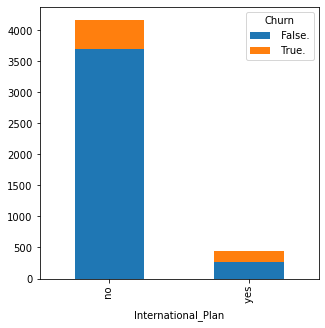

In [8]:
churn_data.groupby(["International_Plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

<AxesSubplot:xlabel='VMail_Plan'>

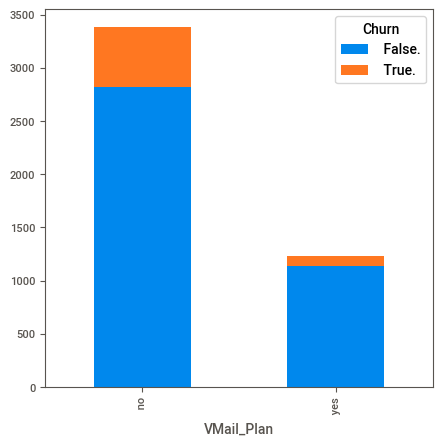

In [19]:
churn_data.groupby(["VMail_Plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

In [26]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account_Length        4617 non-null   int32 
 2   Area_Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International_Plan    4617 non-null   object
 5   VMail_Plan            4617 non-null   object
 6   VMail_Message         4617 non-null   object
 7   Day_Mins              4617 non-null   object
 8   Day_Calls             4617 non-null   object
 9   Day_Charge            4617 non-null   object
 10  Eve_Mins              4617 non-null   object
 11  Eve_Calls             4617 non-null   object
 12  Eve_Charge            4617 non-null   object
 13  Night_Mins            4617 non-null   object
 14  Night_Calls           4617 non-null   object
 15  Night_Charge          4617 non-null   

In [7]:
churn_data.Account_Length=churn_data.Account_Length.astype(int)

In [8]:
churn_data.Area_Code=churn_data.Area_Code.astype(int)
churn_data.VMail_Message=churn_data.VMail_Message.astype(int)
churn_data.Day_Mins=churn_data.Day_Mins.astype(float)
churn_data.Day_Calls=churn_data.Day_Calls.astype(int)
churn_data.Day_Charge=churn_data.Day_Charge.astype(float)
churn_data.Eve_Mins=churn_data.Eve_Mins.astype(float)
churn_data.Eve_Calls=churn_data.Eve_Calls.astype(int)
churn_data.Night_Mins=churn_data.Night_Mins.astype(float)
churn_data.Night_Calls=churn_data.Night_Calls.astype(int)
churn_data.Eve_Charge=churn_data.Eve_Charge.astype(float)
churn_data.Night_Charge=churn_data.Night_Charge.astype(float)
churn_data.International_Mins=churn_data.International_Mins.astype(float)
churn_data.International_calls=churn_data.International_calls.astype(int)
churn_data.International_Charge=churn_data.International_Charge.astype(float)
churn_data.CustServ_Calls=churn_data.CustServ_Calls.astype(int)

In [16]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int32  
 2   Area_Code             4617 non-null   int32  
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int32  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int32  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int32  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int32  
 15  Night_Charge         

In [29]:
churn_data.describe()

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
data1=churn_data[['Account_Length','Area_Code','VMail_Message','Day_Mins','Day_Calls','Day_Charge',
           'Eve_Mins','Eve_Calls','Eve_Charge','Night_Mins','Night_Calls','Night_Charge',
                  'International_Mins','International_calls',
                  'International_Charge','CustServ_Calls']]
data1

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,57,510,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3
4613,177,408,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3
4614,67,408,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1
4615,98,415,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0


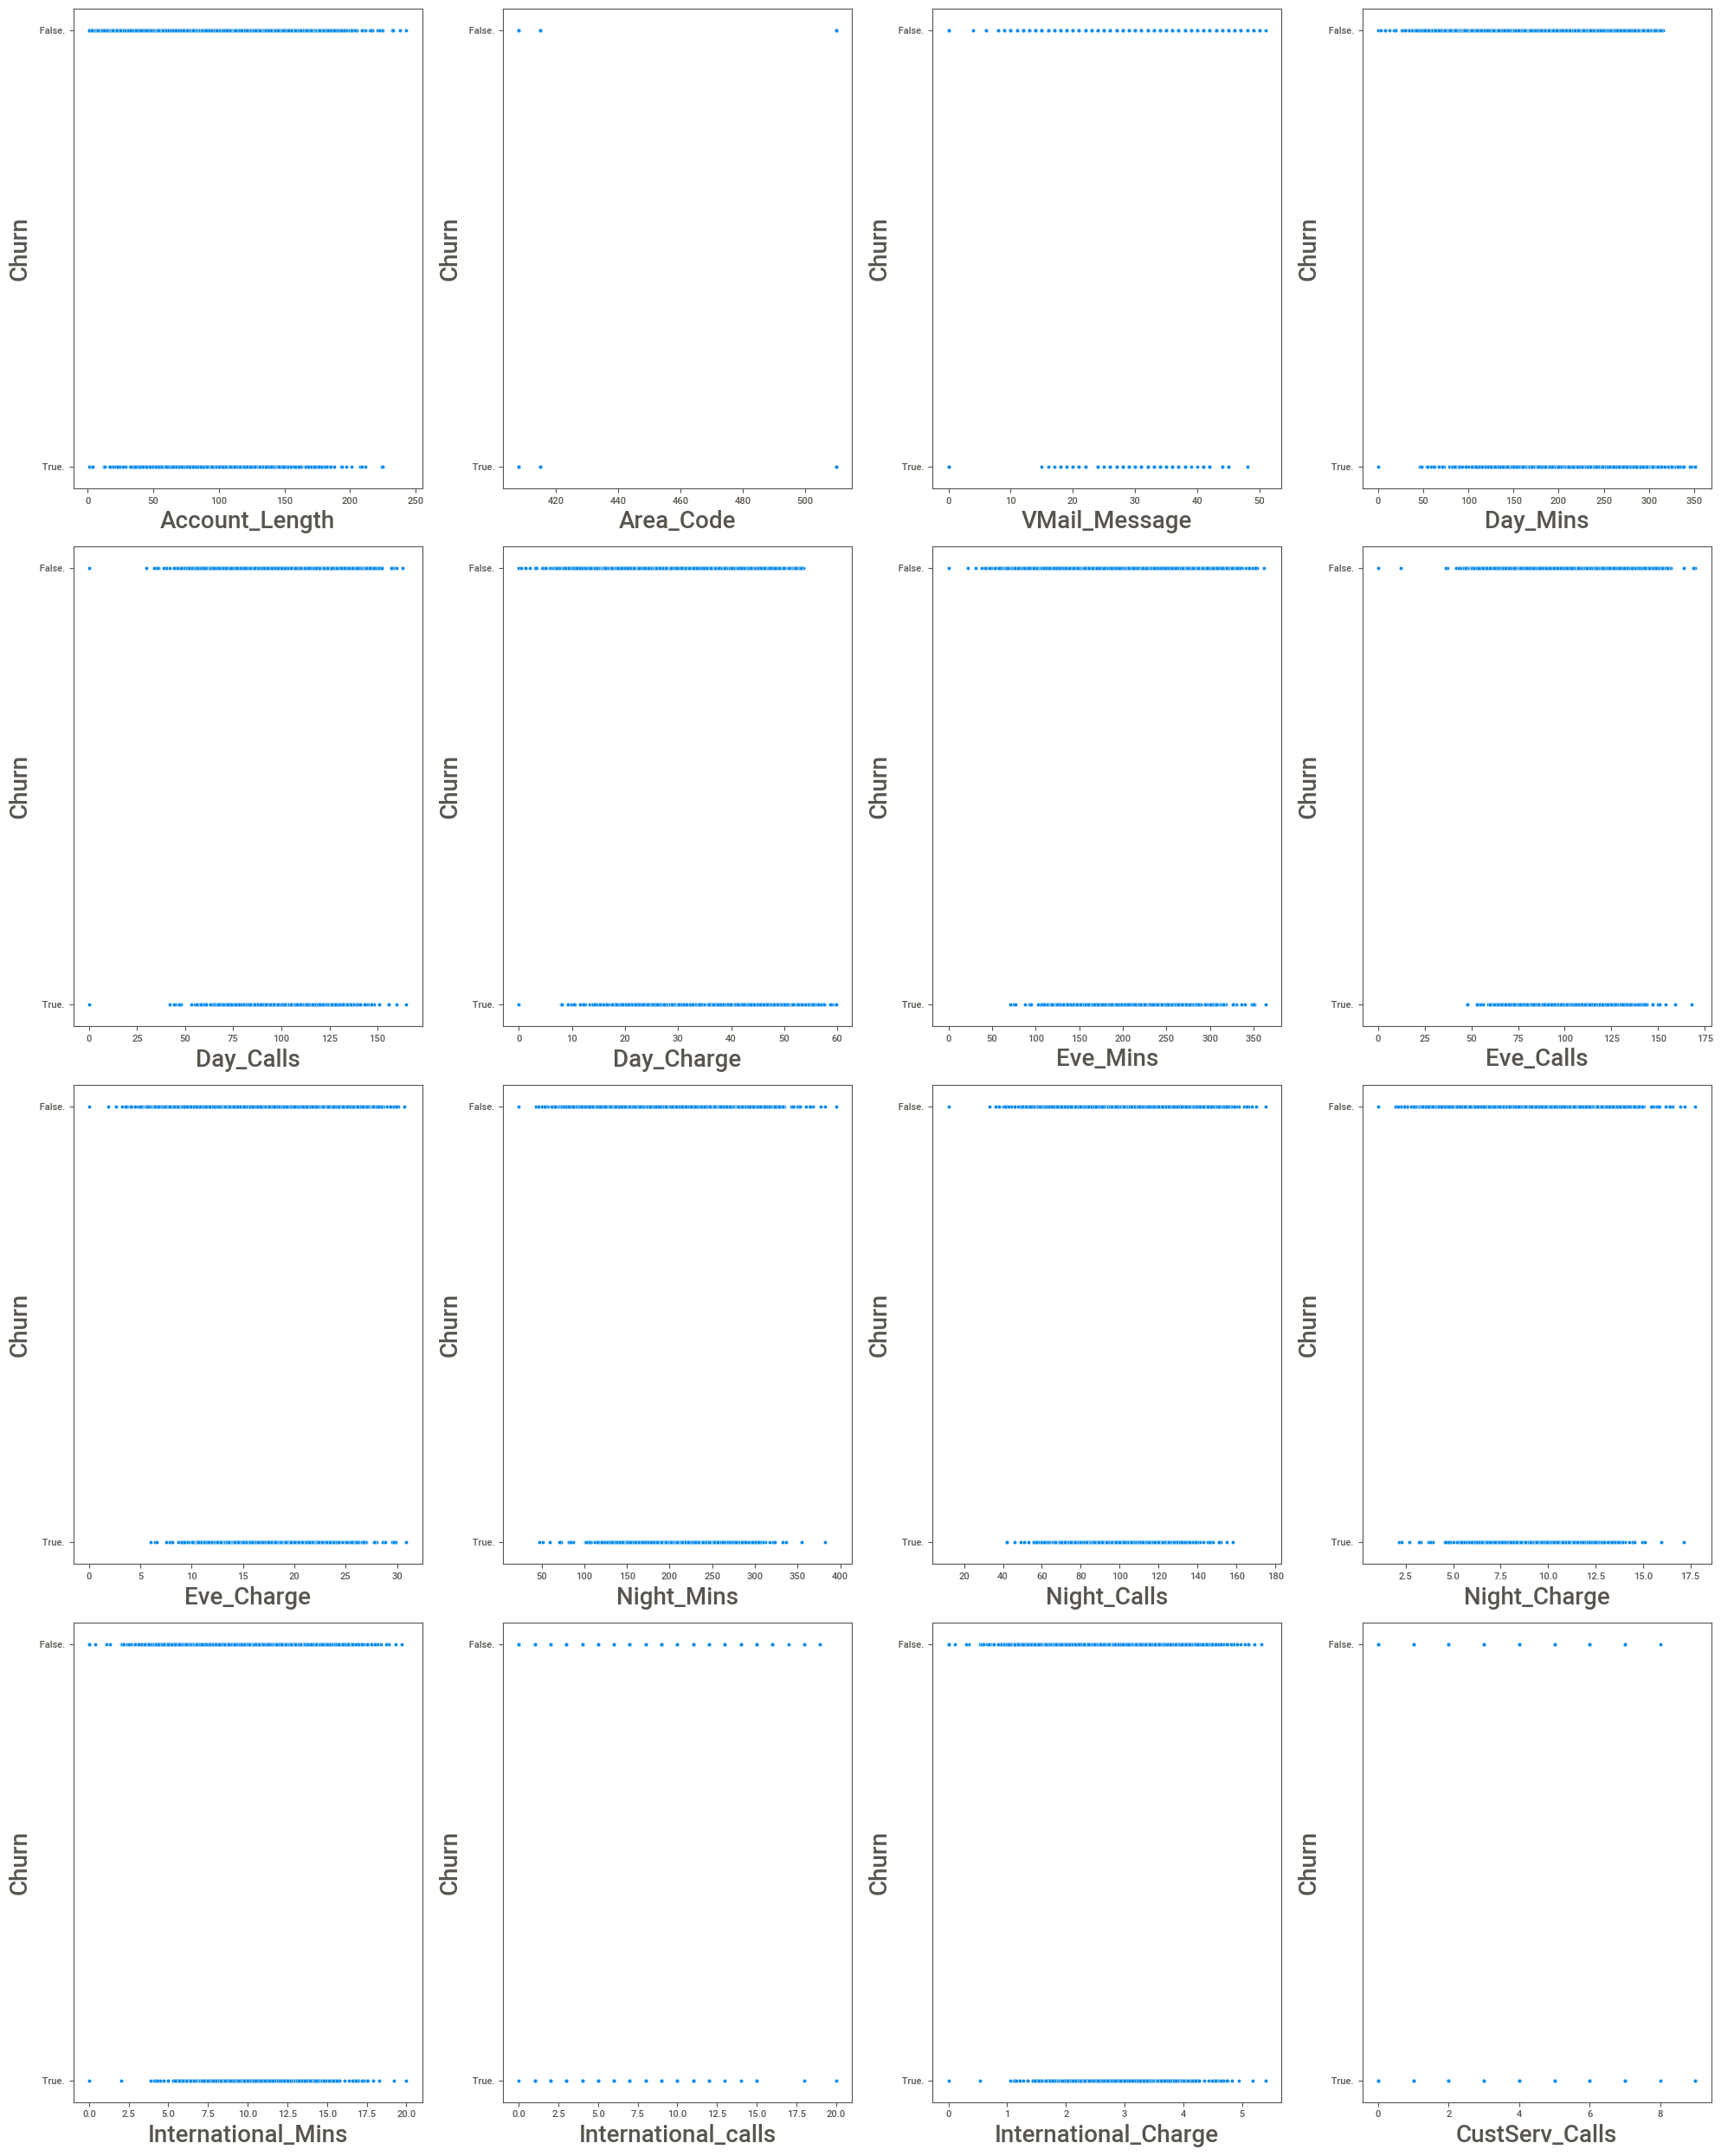

In [14]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=16 :   ## as there is 16 columns
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=data1[column].dropna(axis=0)
                        ,y=churn_data.Churn)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Churn',fontsize=20)
    plotnumber+=1
plt.tight_layout()

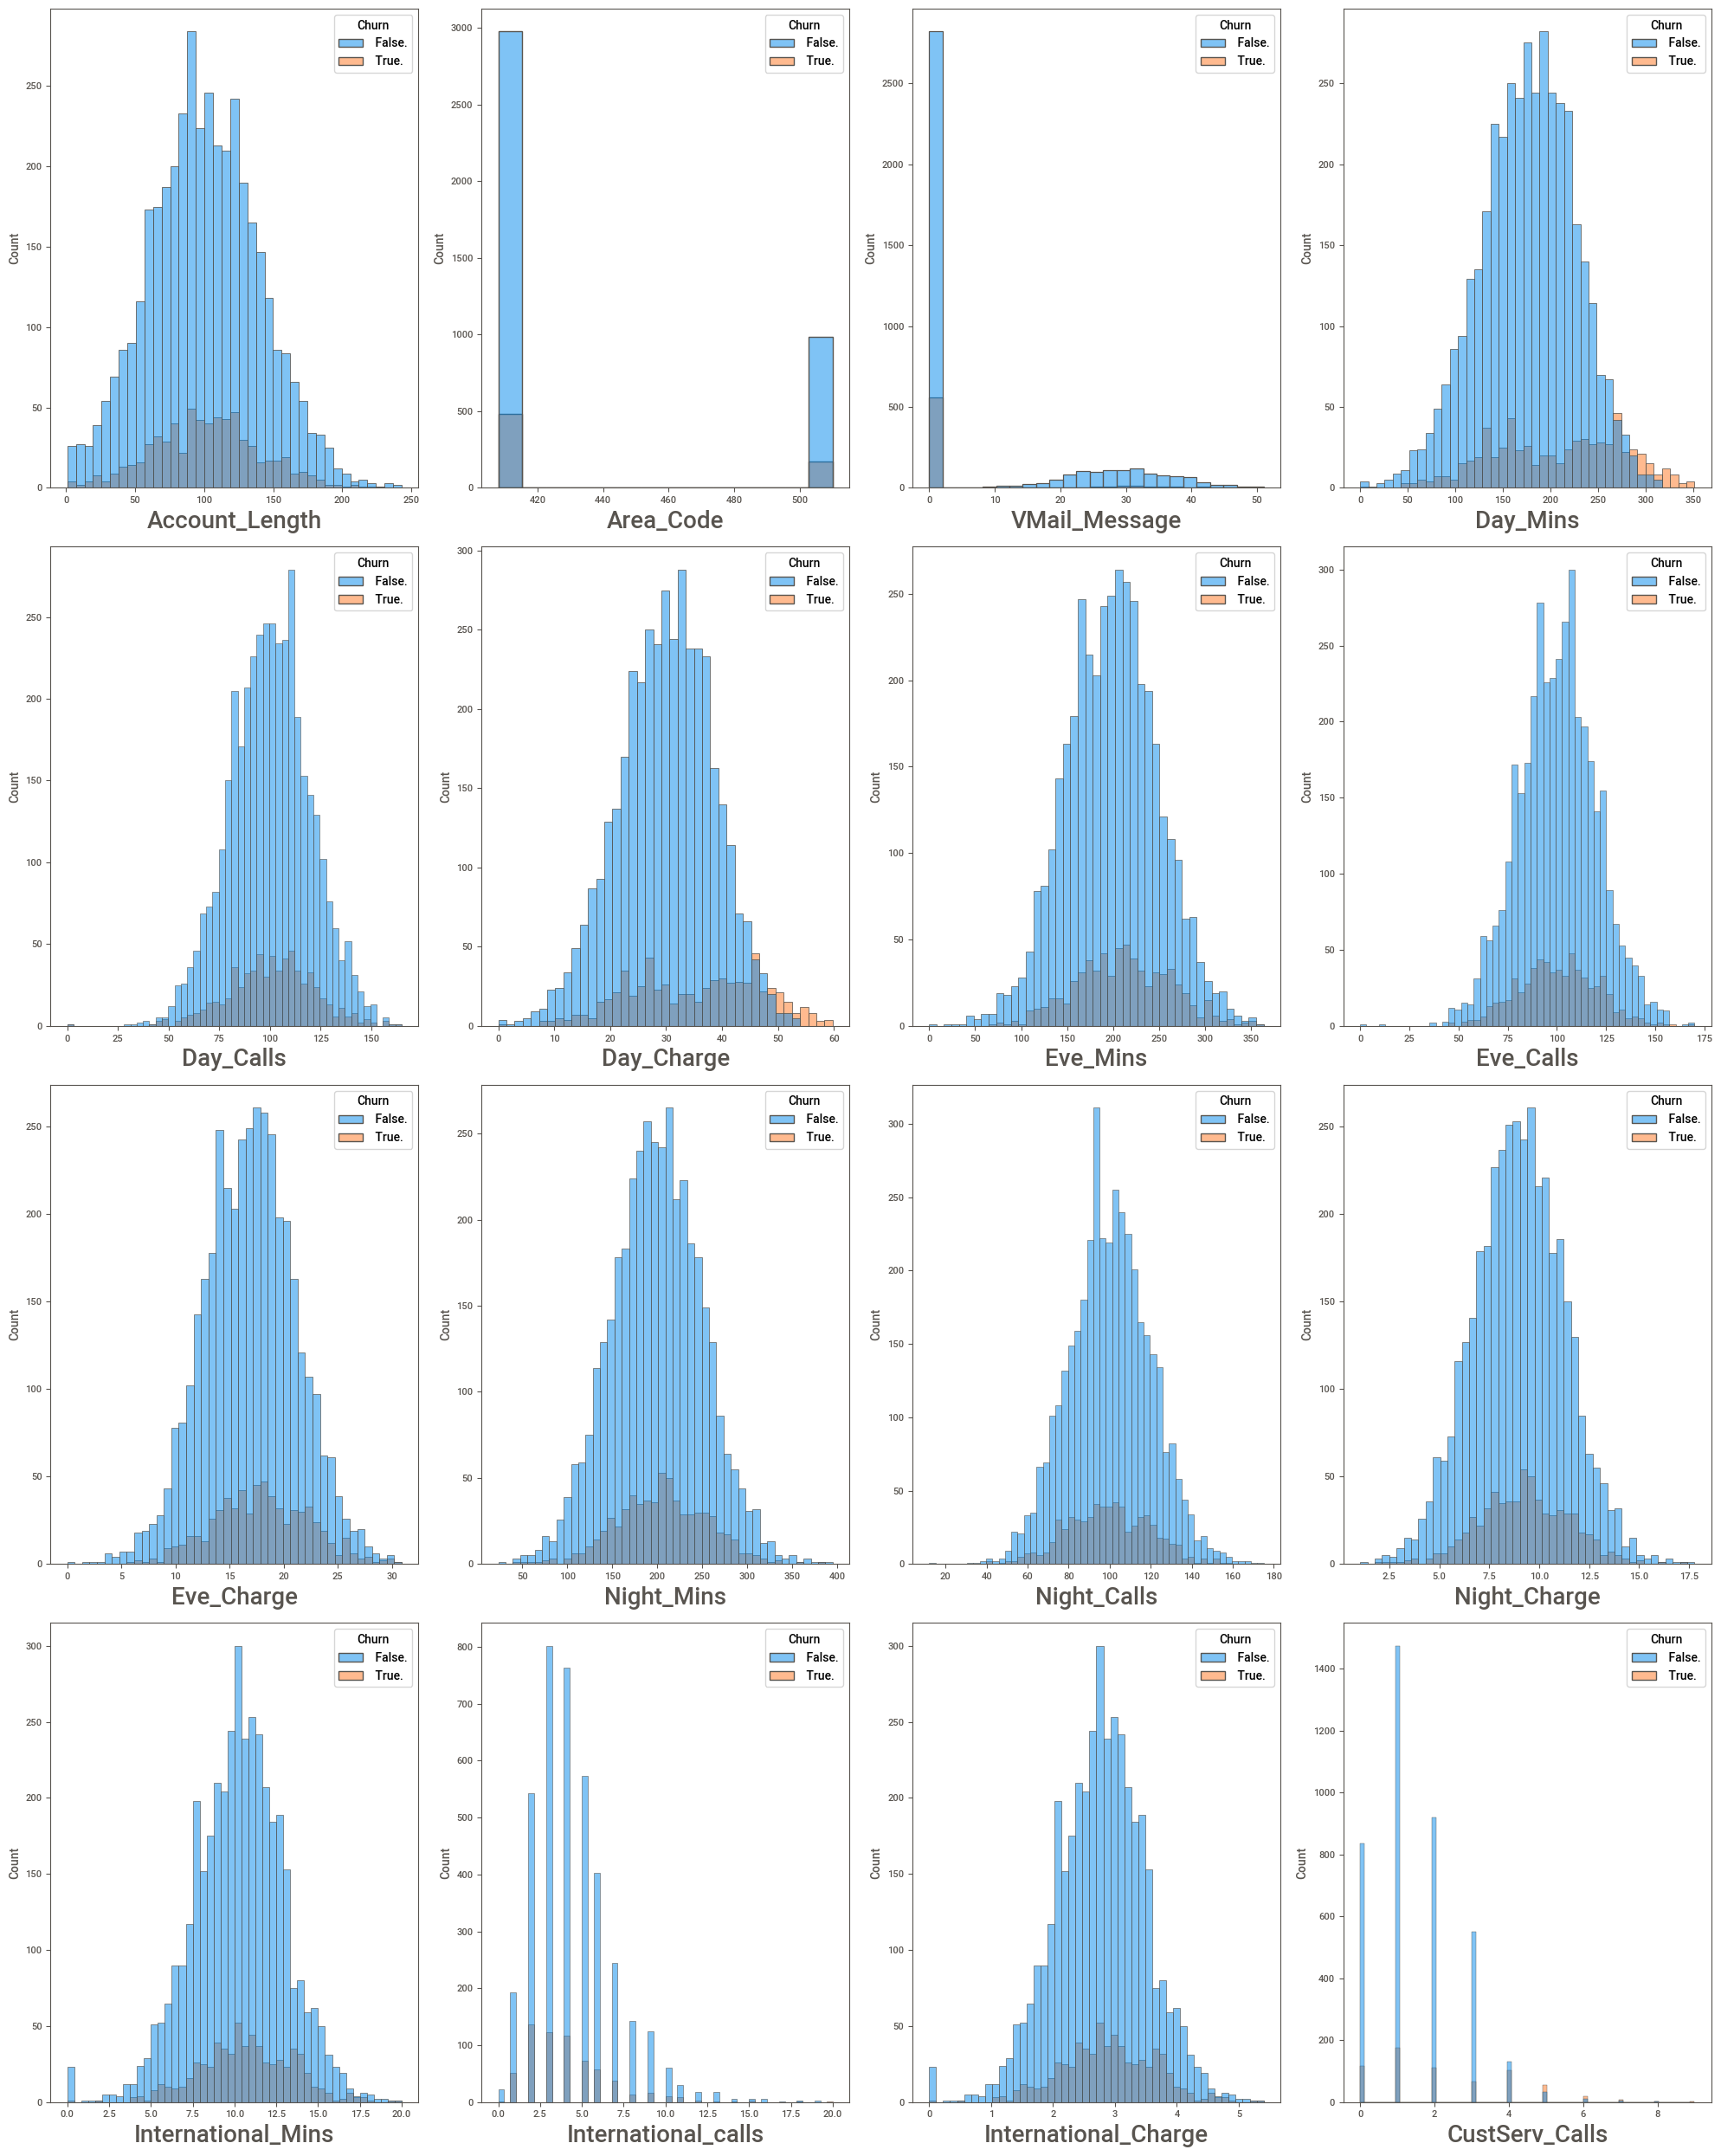

In [32]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data1[column],hue=churn_data.Churn)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

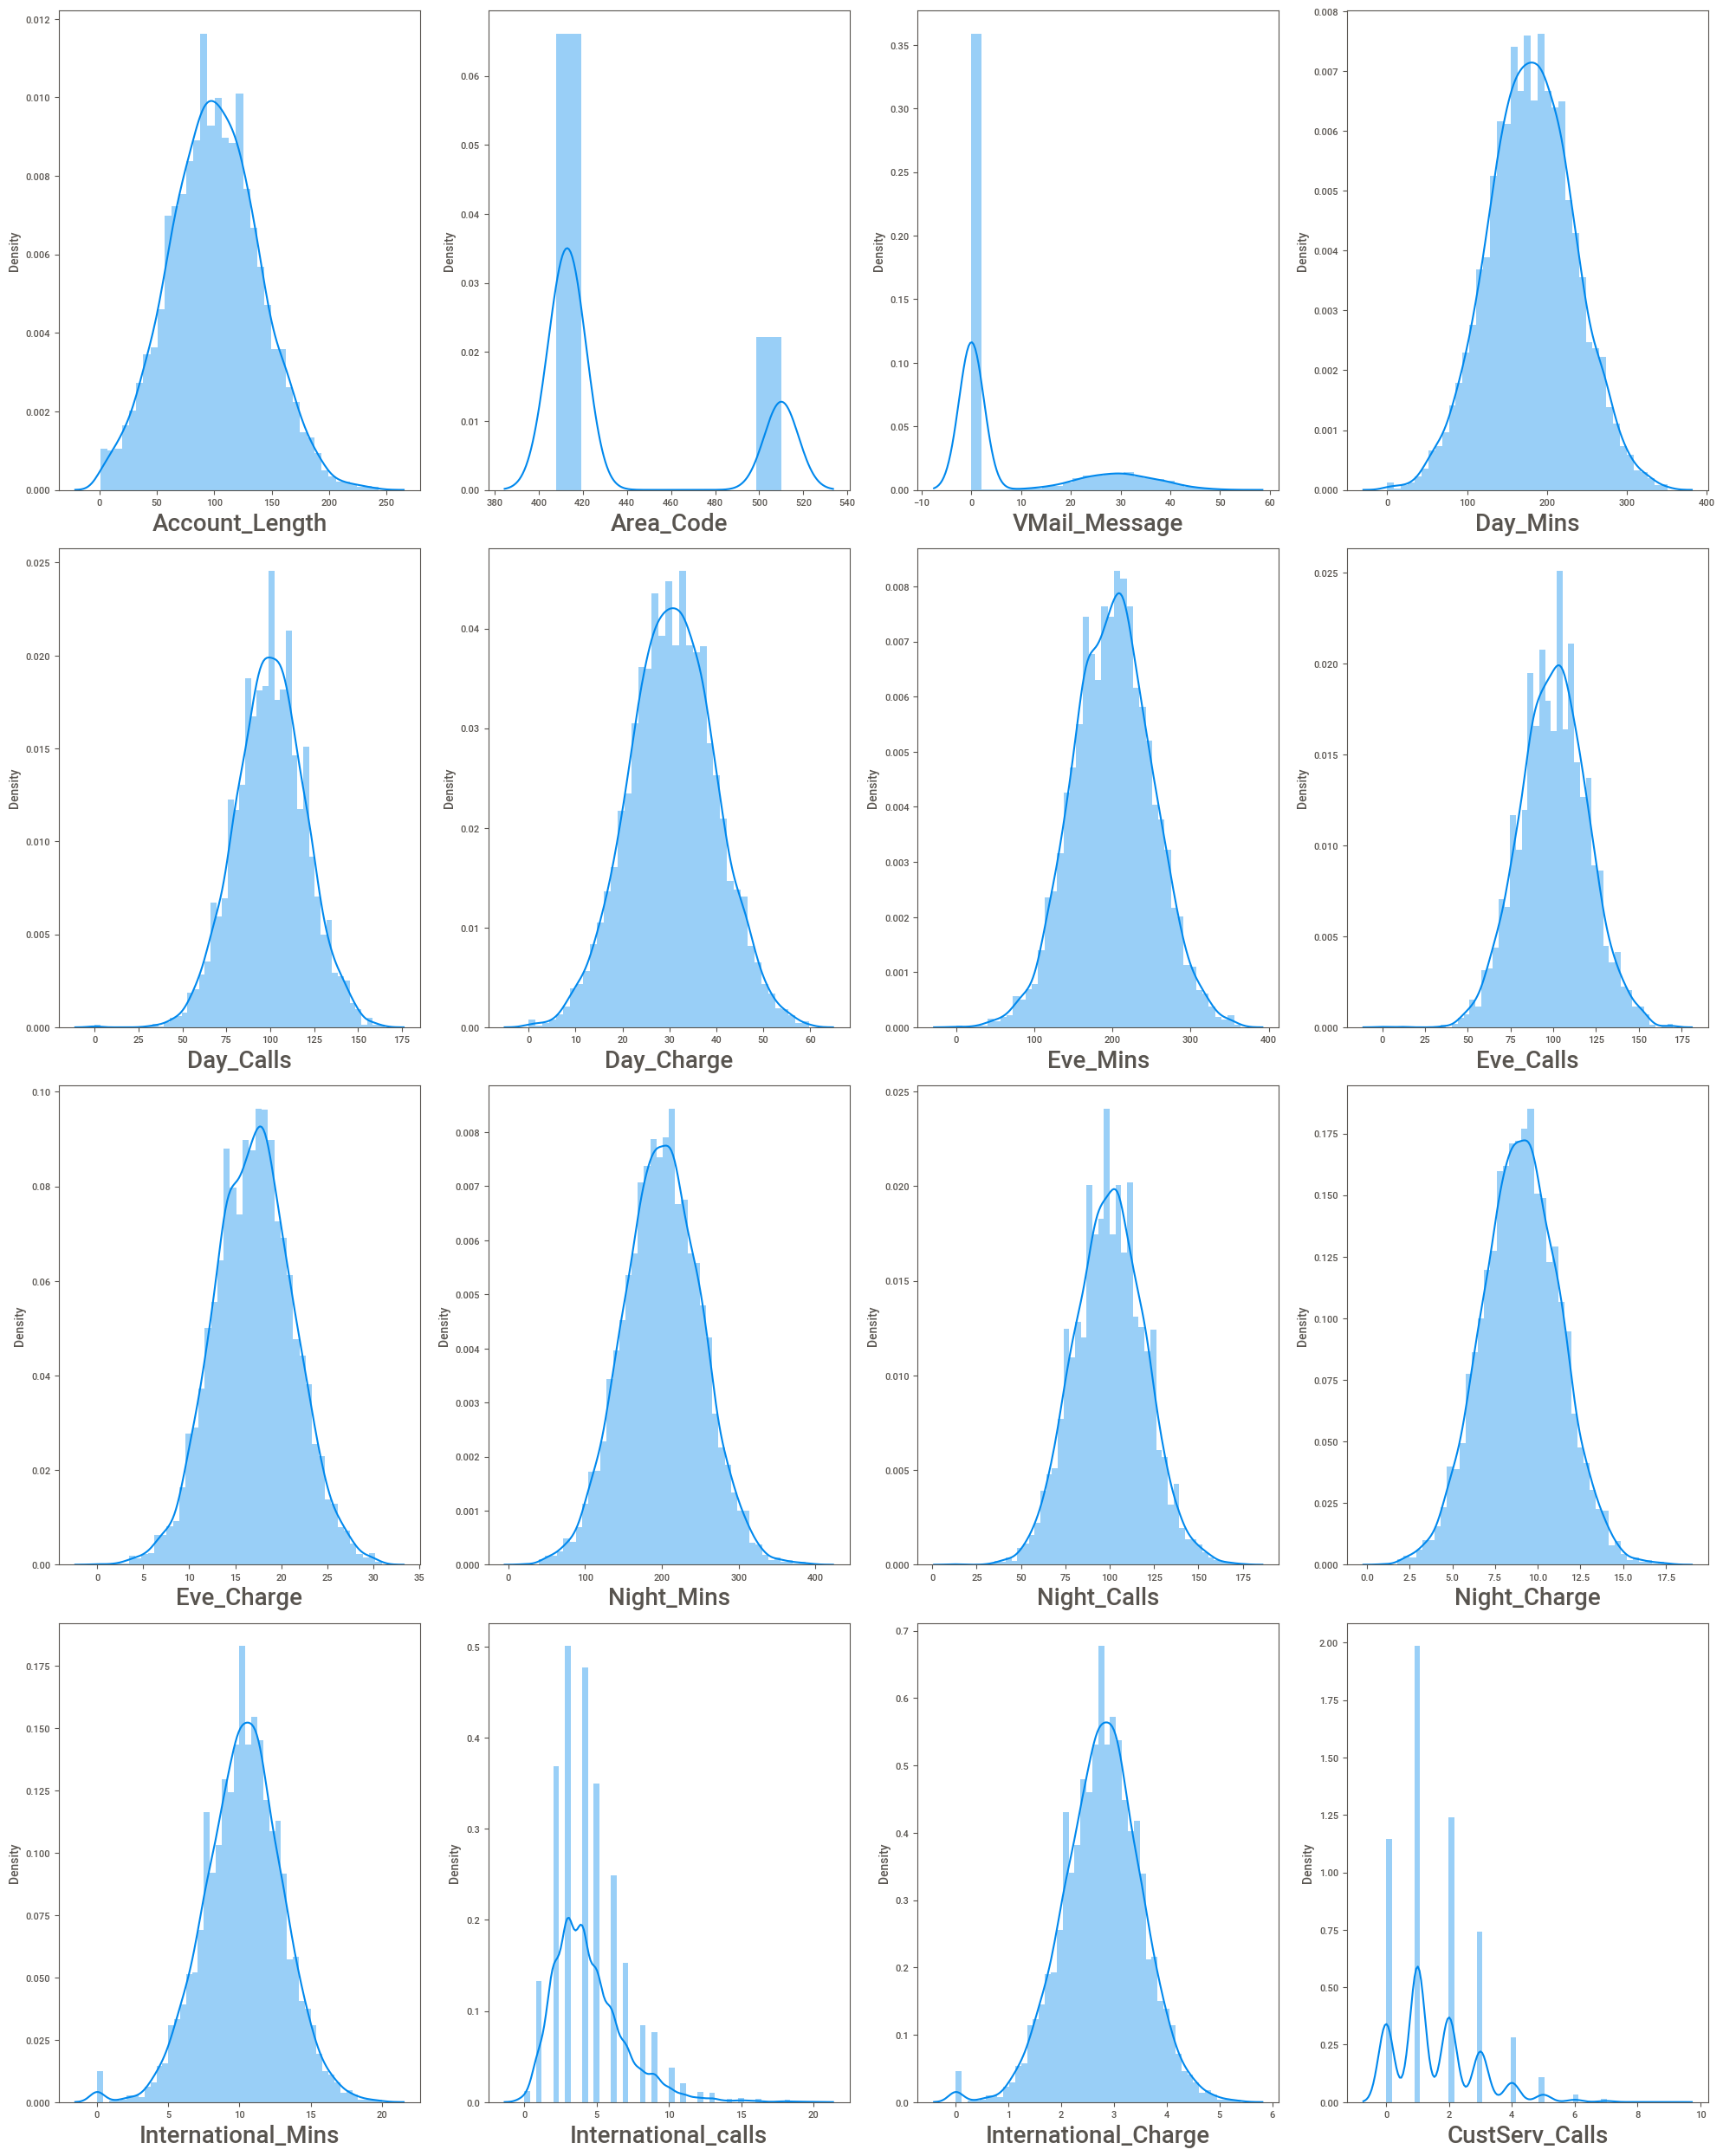

In [33]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x=data1[column].dropna(axis=0))
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

## Categorical Features Distributions

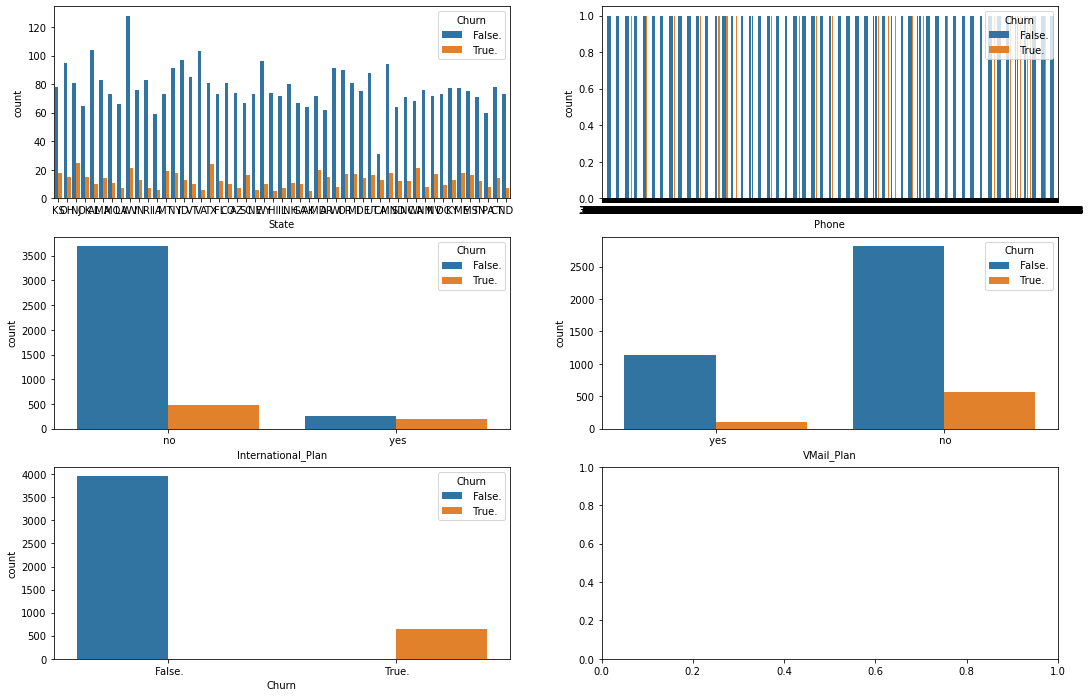

In [10]:
categorical = ['State', 'Phone', 'International_Plan', 'VMail_Plan', 'Churn']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
for col, ax in zip(categorical[0:], axs.ravel()):
    sns.countplot(x=col, data=churn_data, ax=ax,hue=churn_data.Churn)

Churn_Flag,False.,True.
State,,
AK,0.016158,0.007622
AL,0.026256,0.015244
AR,0.015653,0.022866
AZ,0.018682,0.010671
CA,0.007826,0.019817
CO,0.020449,0.015244
CT,0.019692,0.021341
DC,0.018430,0.013720
DE,0.018935,0.021341


Churn_Flag,False.,True.
Phone,,
327-1058,0.000252,0.0
327-1319,0.000252,0.0
327-2040,0.000252,0.0
327-2475,0.000252,0.0
327-3053,0.000252,0.0
...,...,...
422-8333,0.000252,0.0
422-8344,0.000252,0.0
422-8472,0.000252,0.0


Churn_Flag,False.,True.
International_Plan,,
no,0.93436,0.716463
yes,0.06564,0.283537


Churn_Flag,False.,True.
VMail_Plan,,
no,0.712446,0.852134
yes,0.287554,0.147866


Churn_Flag,False.,True.
Churn,,
False.,1.0,0.0
True.,0.0,1.0


Account_Length


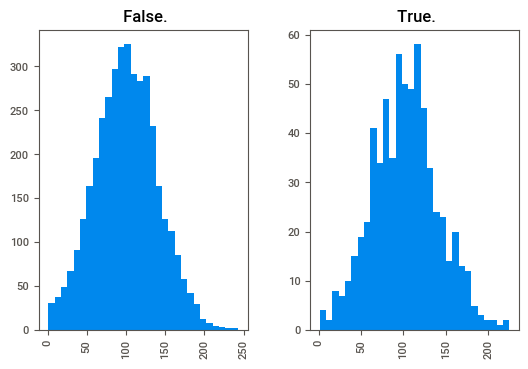

Area_Code


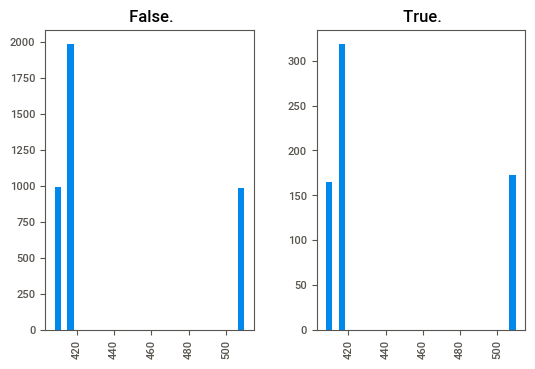

VMail_Message


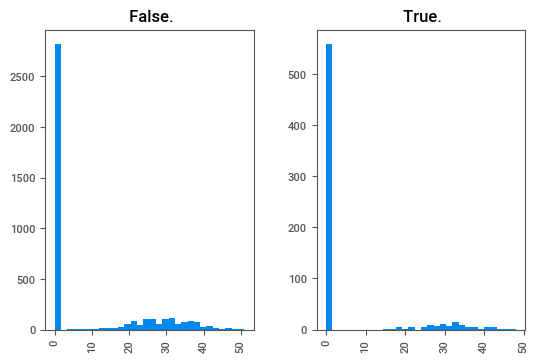

Day_Mins


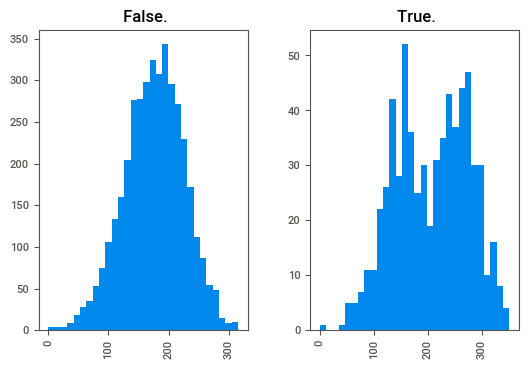

Day_Calls


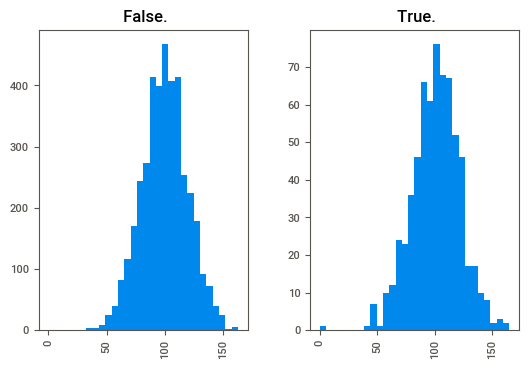

Day_Charge


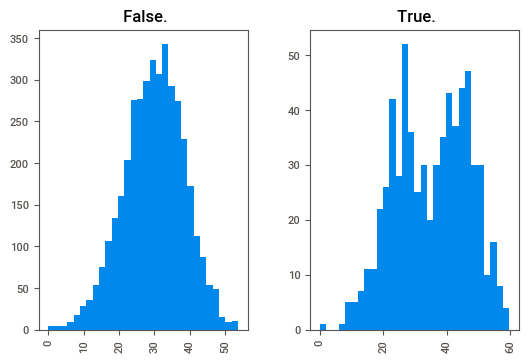

Eve_Mins


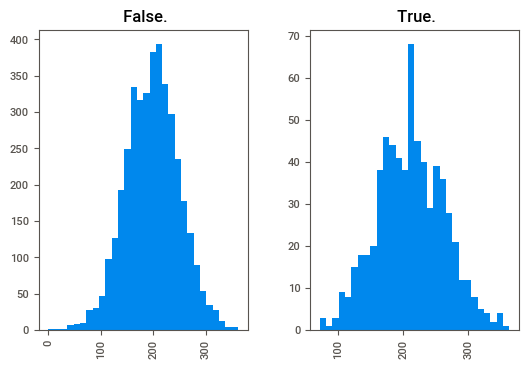

Eve_Calls


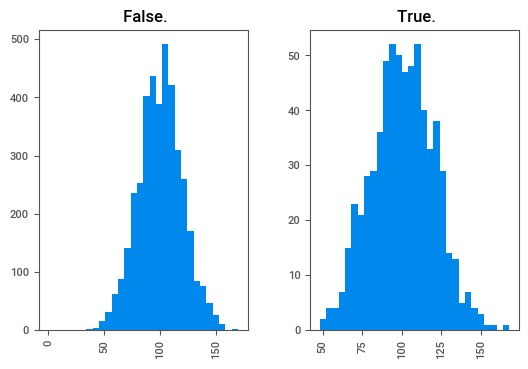

Eve_Charge


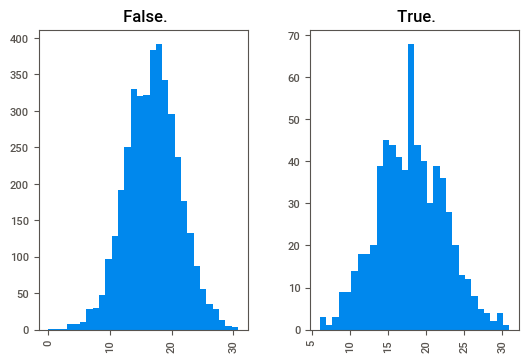

Night_Mins


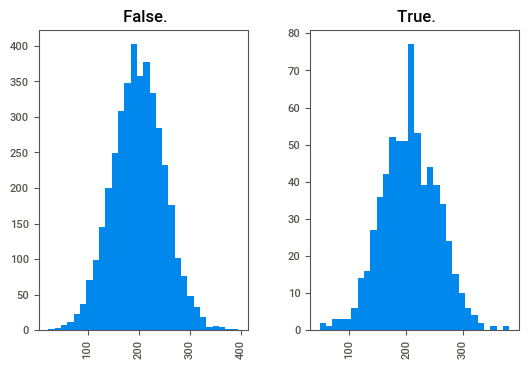

Night_Calls


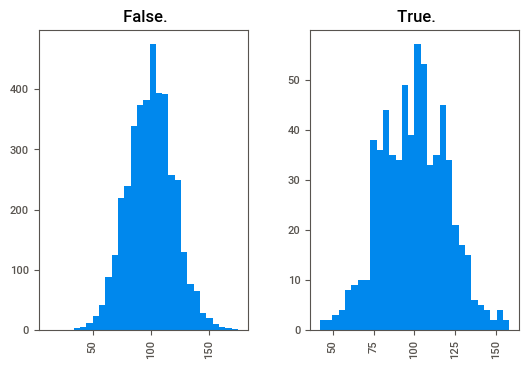

Night_Charge


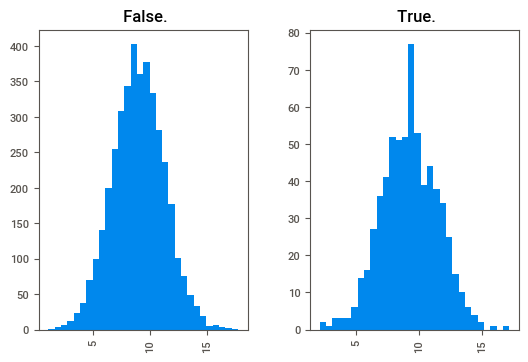

International_Mins


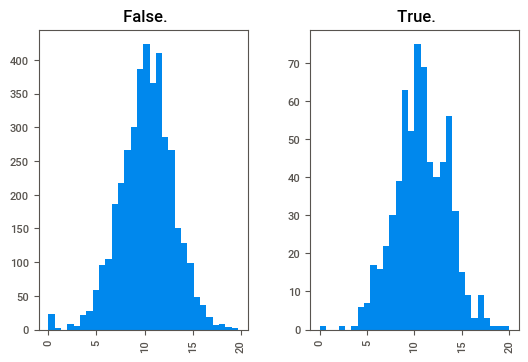

International_calls


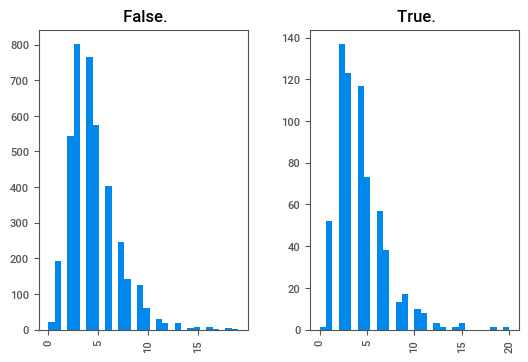

International_Charge


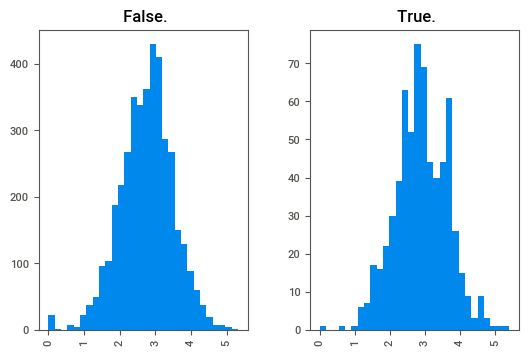

CustServ_Calls


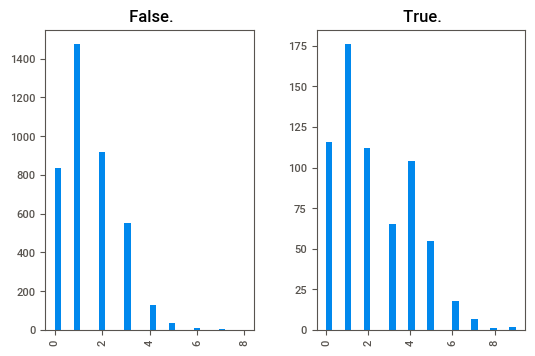

In [17]:
for column in churn_data.select_dtypes(include=["object"]).columns:
    if column != "Churn_Flag":
        display(pd.crosstab(index=churn_data[column], columns=churn_data["Churn_Flag"], normalize="columns"))

for column in churn_data.select_dtypes(exclude=["object"]).columns:
    print(column)
    hist = churn_data[[column, "Churn_Flag"]].hist(by="Churn_Flag", bins=30)
    plt.show()

### Insights from Categorical Analysis

State: Most customers are from WV State. 

The number of days that this account has been active 90days is the frequent values.

Customers who do not have international plan and not leave the telcompany is the majority.

Those who do not have voice message feature and leave the telcompany has the highest amount.

For International pan and vmail plan,customers who have these 2 plan and left the company is the least (Not major factors).

Overall,Customers who have intention to leave,will decrease their usage for a period.

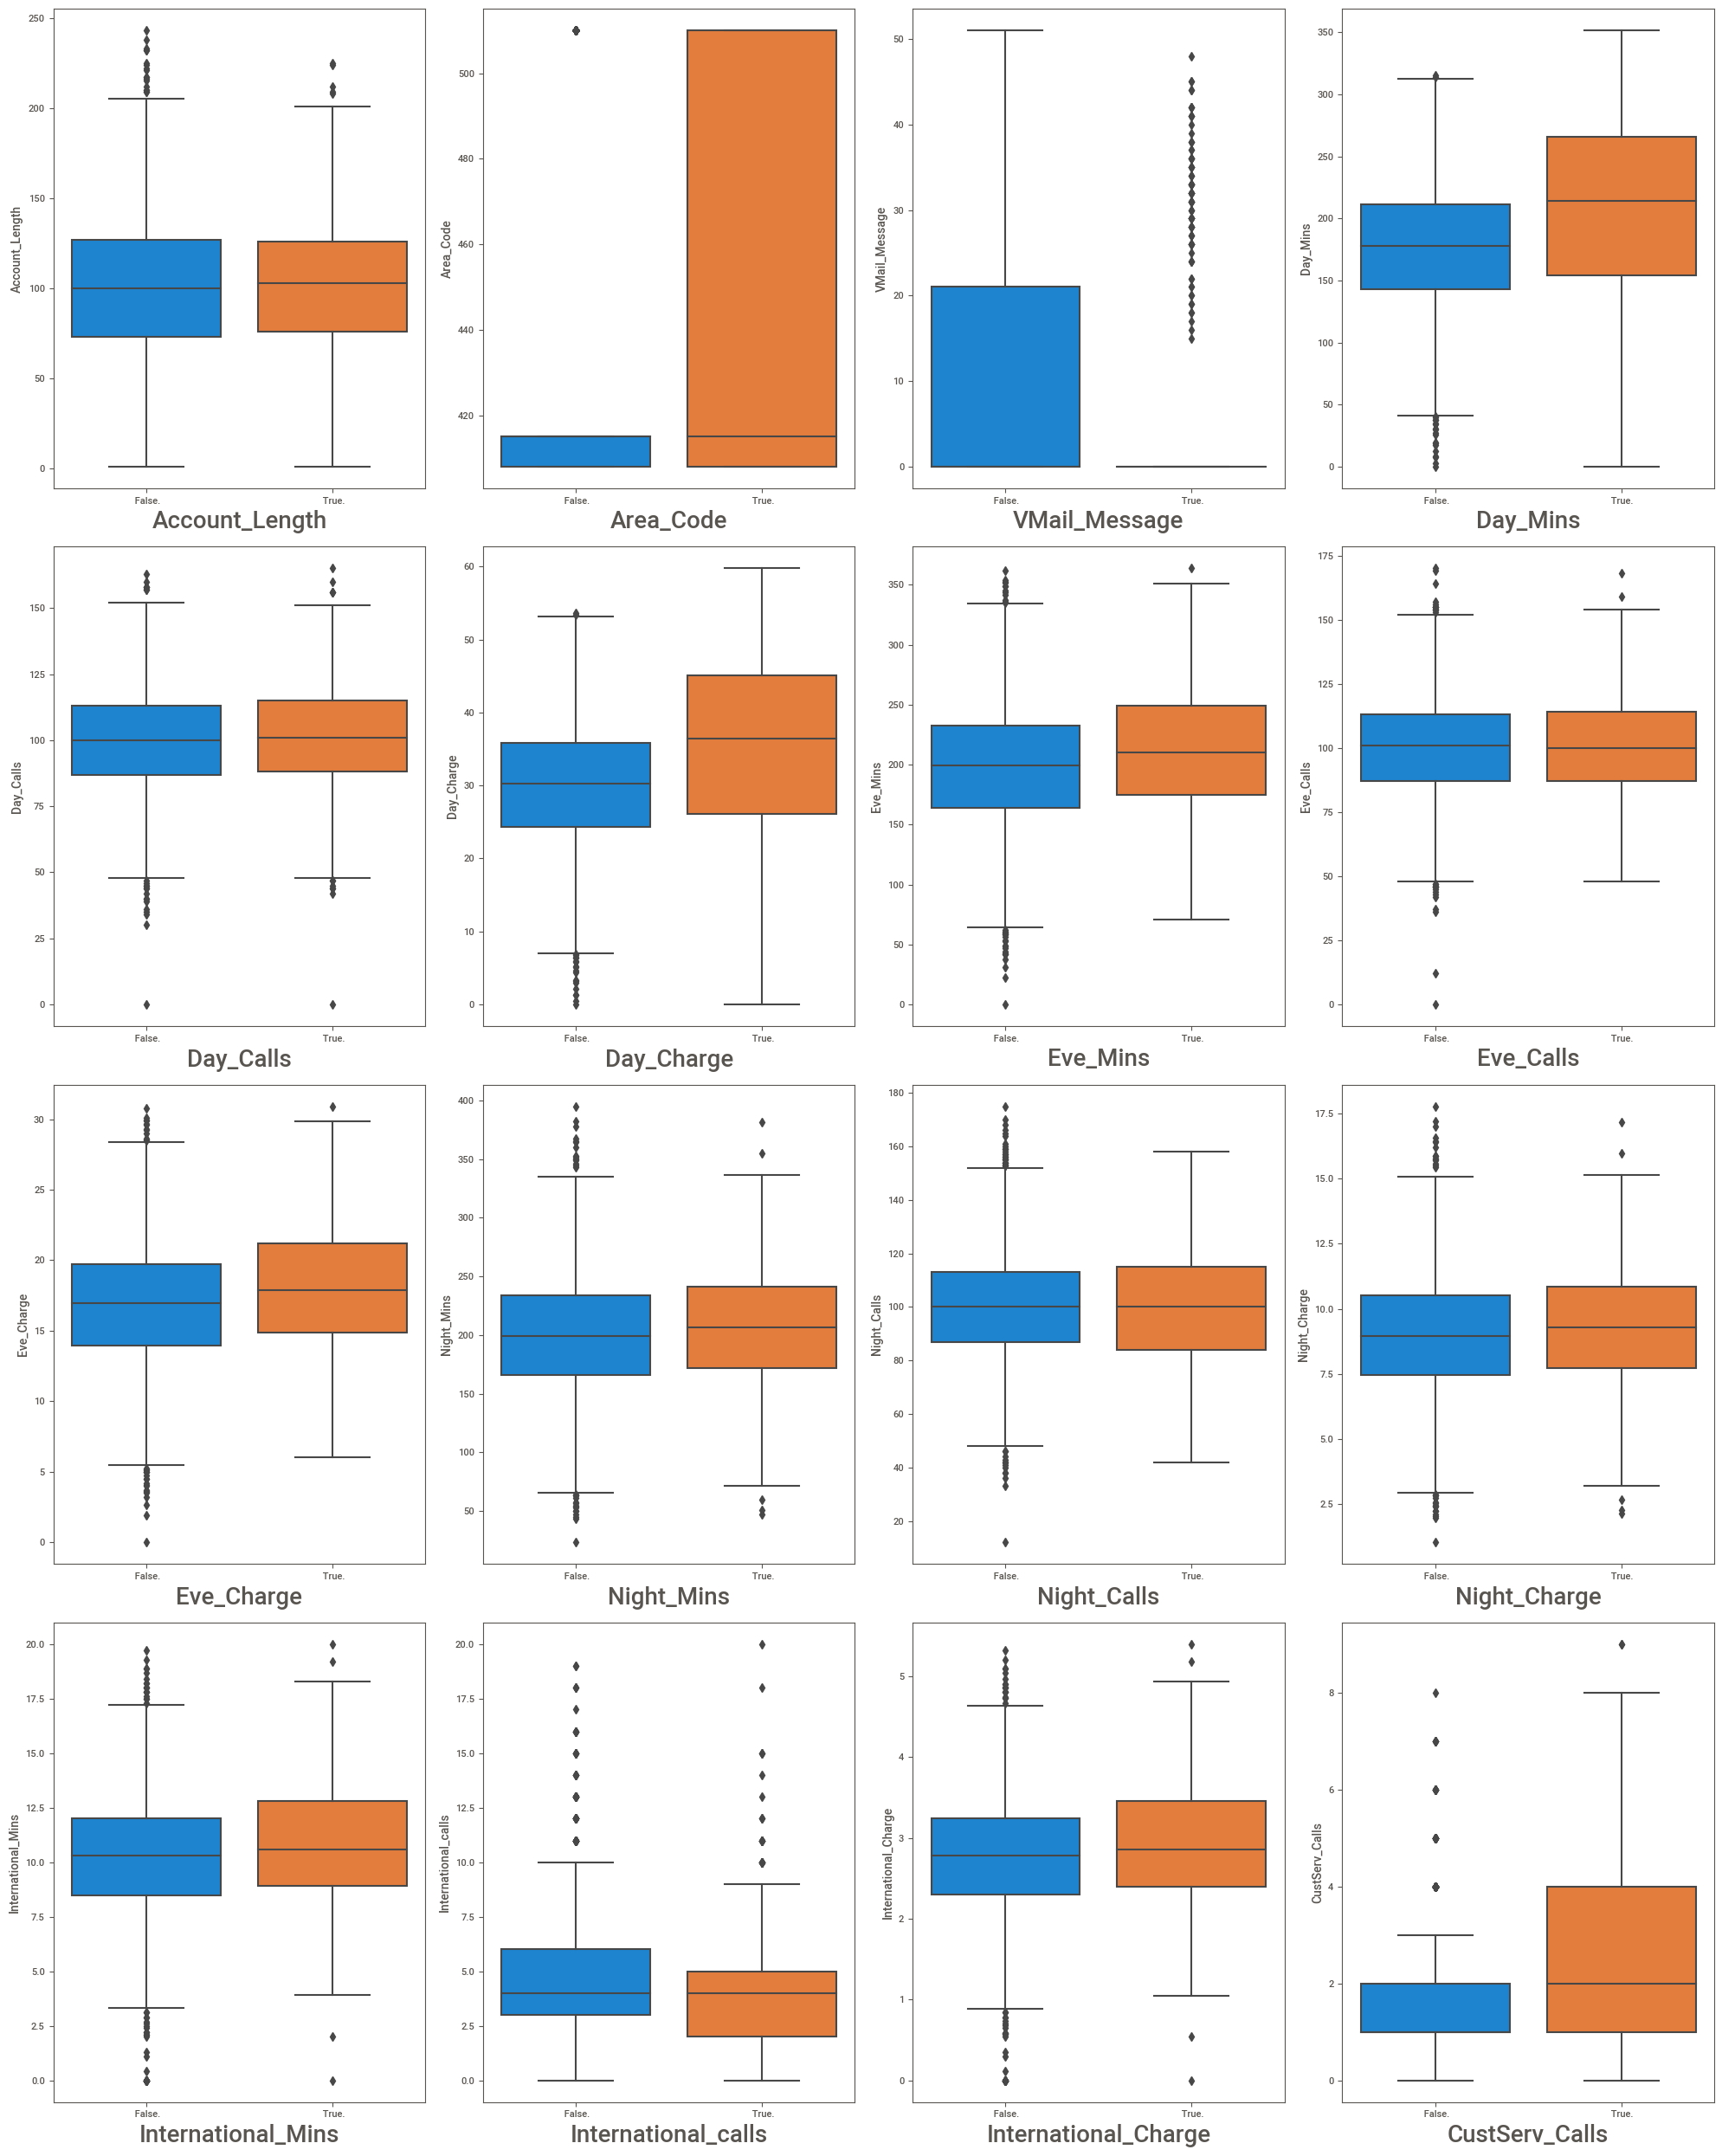

In [18]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(x=churn_data.Churn,y=data1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

## Feature Insights from EDA

'VMail_Message':3381customers who do not buy the Vmail plan has the highest amount.

'Account_Length':MOst customers account have been activated 90-120days

'Day_Mins':Most customers used 153-220 minutes

'Day_Calls'Most customers used 100-120 calls

'Day_Charge':MOst customer were charged 30-37

'Eve_Mins':Most customers used in evening is 160-200mins

'Eve_Calls':Customers made the highest of total evening calls 105-120

'Eve_Charge':MOst customer were charged 15-19 for evening usage

'Night_Mins':Most customers used 160-210 mins at night

'Night_Calls':Customers made the highest of total night calls is 90-110

'Night_Charge':MOst customer were charged 8-9 for night usage

'International_Mins':Most customers used 10-12 minutes

'International_calls':Most customers used 2-4 calls

'International_Charge':MOst customer were charged 30-37

'CustServ_Calls'There have 1651 made1 calls to customer service,as 951 customers have never called to customer service

We can say, Vmail is not a neccesity for people,as the usage is low.The most frequent time people made calls is evening.International call is expensive,so no much people will use it.

The highest frequent of the three-digit area code of the corresponding customer’s phone number is 415.Most of the customers do not have a voice mail feature and an international calling plan.Most customer choose not leave the telcompany.



## Data Preprocessing

In [19]:
churn_data.isnull().sum()

State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

In [20]:
## There are categorical data need to convert them into numerical

In [21]:
churn_data.State.value_counts()

WV    149
AL    114
MN    112
OH    110
ID    110
VA    109
NY    109
OR    107
NJ    106
WY    106
TX    105
UT    104
WI     99
MI     98
MA     97
KS     96
VT     95
ME     95
MD     92
MT     92
CT     92
NH     91
MS     91
CO     91
KY     90
RI     90
IN     89
WA     89
NV     89
DE     89
FL     85
MO     84
NM     84
NC     83
SC     83
TN     83
DC     82
AZ     81
OK     80
ND     80
IL     79
HI     79
NE     79
GA     77
AR     77
SD     76
LA     73
AK     69
PA     68
IA     65
CA     44
Name: State, dtype: int64

In [11]:
## Converting the numerical equivalent
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
churn_data['State']=le.fit_transform(churn_data['State'])

In [45]:
churn_data.Phone.value_counts()

2047    1
2432    1
4603    1
2556    1
509     1
       ..
1278    1
3327    1
1282    1
3331    1
0       1
Name: Phone, Length: 4617, dtype: int64

In [12]:
## Converting the numerical equivalent
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
churn_data['Phone']=le.fit_transform(churn_data['Phone'])

In [14]:
churn_data.International_Plan.value_counts()

0    4171
1     446
Name: International_Plan, dtype: int64

In [13]:
le=LabelEncoder()
churn_data['International_Plan']=le.fit_transform(churn_data['International_Plan'])

In [16]:
churn_data.VMail_Plan.value_counts()

0    3381
1    1236
Name: VMail_Plan, dtype: int64

In [14]:
le=LabelEncoder()
churn_data['VMail_Plan']=le.fit_transform(churn_data['VMail_Plan'])

In [18]:
churn_data.Churn.value_counts()

0    3961
1     656
Name: Churn, dtype: int64

In [15]:
le=LabelEncoder()
churn_data['Churn']=le.fit_transform(churn_data['Churn'])

In [16]:
le=LabelEncoder()
churn_data['Churn_Flag']=le.fit_transform(churn_data['Churn_Flag'])

In [17]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   int32  
 1   Account_Length        4617 non-null   int32  
 2   Area_Code             4617 non-null   int32  
 3   Phone                 4617 non-null   int32  
 4   International_Plan    4617 non-null   int32  
 5   VMail_Plan            4617 non-null   int32  
 6   VMail_Message         4617 non-null   int32  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int32  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int32  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int32  
 15  Night_Charge         

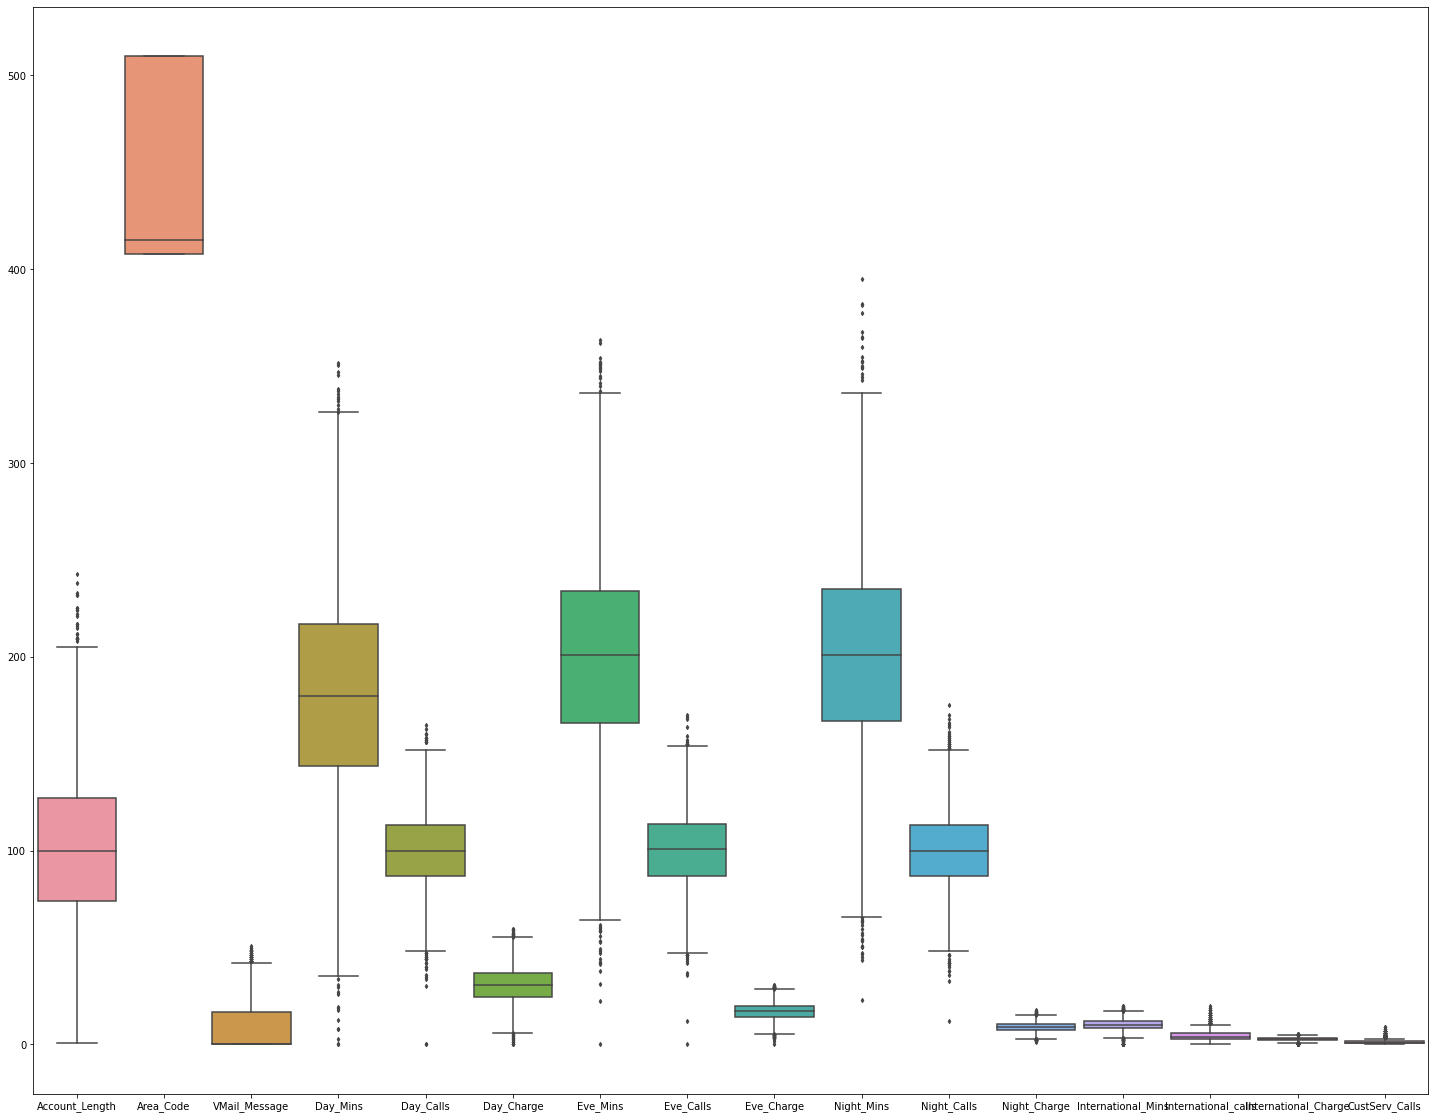

In [22]:
## Lets check outliers in any
## chekcing the outliers
fig, ax = plt.subplots(figsize=(25,20))
sns.boxplot(data=data1, width= 0.9,ax=ax,  fliersize=3)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Account_Length'>

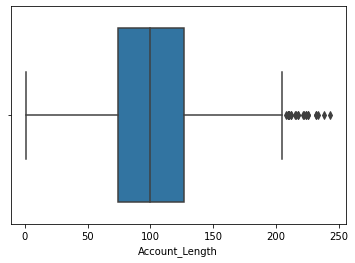

In [23]:
sns.boxplot(churn_data.Account_Length)

## Feature Selection

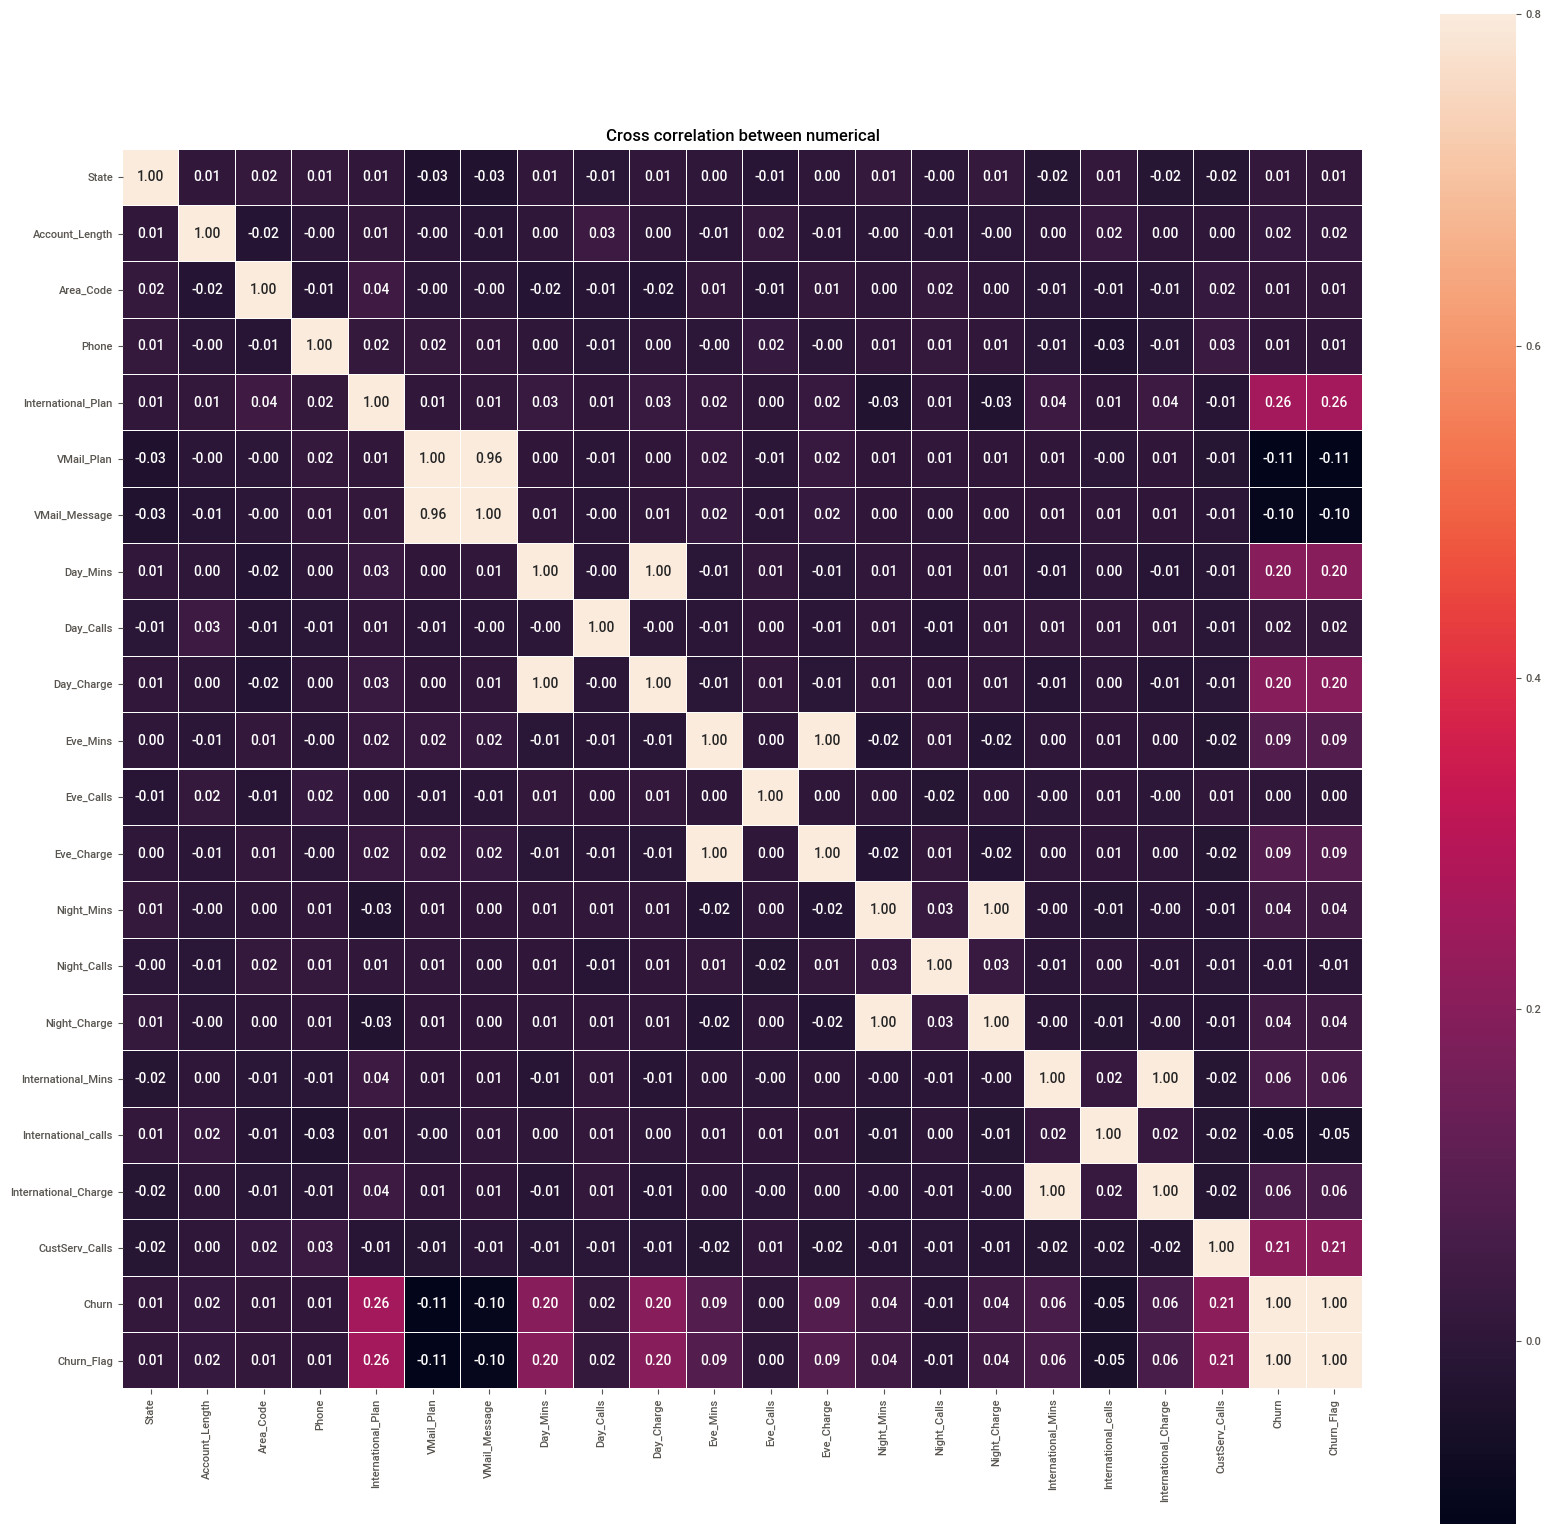

In [28]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(churn_data.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()
## Vmail_Plan and Vmail_Message are highly correlated to each othe, lets drop one of them.
## Day_Mins and Day_Charge are highly correlated to each othe, lets drop one of them.
## Eve_Mins and Eve_Charge are highly correlated to each othe, lets drop one of them.
## Night_Mins and Night_Charge are highly correlated to each othe, lets drop one of them.
## International_Mins and International_Charge are highly correlated to each othe, lets drop one of them.

In [19]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int32  
 2   Area_Code             4617 non-null   int32  
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int32  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int32  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int32  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int32  
 15  Night_Charge         

In [18]:
data2 = churn_data.drop(['VMail_Message','Day_Mins','Eve_Mins','Night_Mins','International_Mins','Phone','Churn'],axis=1)
data2.head()

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,International_calls,International_Charge,CustServ_Calls,Churn_Flag
0,16,128,415,0,1,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,35,107,415,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,31,137,415,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,35,84,408,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,36,75,415,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [31]:
## checking the duplicate rows
data2.duplicated().sum()

0

In [32]:
## checking the constant features
data2.describe()
## the standard deviation of all features are not 0 ,so the there are constant features in the dataset.

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,International_Mins,International_calls,CustServ_Calls,Churn
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,26.041585,100.645224,437.046350,2308.000000,0.096600,0.267706,180.447152,100.054364,200.429088,100.179770,200.623933,99.944120,10.279294,4.433831,1.567035,0.142084
std,14.790361,39.597194,42.288212,1332.957426,0.295444,0.442812,53.983540,19.883027,50.557001,19.821314,50.543616,19.935053,2.757361,2.457615,1.307019,0.349174
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,74.000000,408.000000,1154.000000,0.000000,0.000000,143.700000,87.000000,165.900000,87.000000,167.100000,87.000000,8.600000,3.000000,1.000000,0.000000
50%,26.000000,100.000000,415.000000,2308.000000,0.000000,0.000000,180.000000,100.000000,200.800000,101.000000,200.800000,100.000000,10.300000,4.000000,1.000000,0.000000
75%,39.000000,127.000000,510.000000,3462.000000,0.000000,1.000000,216.800000,113.000000,234.000000,114.000000,234.900000,113.000000,12.100000,6.000000,2.000000,0.000000
max,50.000000,243.000000,510.000000,4616.000000,1.000000,1.000000,351.500000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000,1.000000


## Model Creation

In [19]:
## Defining X and y and creating dependent and independent variables
X = data2.drop(columns = ['Churn_Flag']) ## independent variable
y = data2['Churn_Flag'] ## Dependent or target variable"

In [20]:
X

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,International_calls,International_Charge,CustServ_Calls
0,16,128,415,0,1,110,45.07,99,16.78,91,11.01,3,2.70,1
1,35,107,415,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1
2,31,137,415,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0
3,35,84,408,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2
4,36,75,415,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,34,57,510,0,1,81,24.48,112,15.91,122,7.14,6,2.30,3
4613,32,177,408,0,1,91,32.13,96,25.76,116,7.36,1,4.24,3
4614,46,67,408,0,1,126,21.68,129,25.17,91,9.04,3,3.51,1
4615,22,98,415,0,1,98,28.71,117,19.24,96,7.45,3,3.86,0


In [33]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4612    0
4613    0
4614    0
4615    0
4616    0
Name: Churn_Flag, Length: 4617, dtype: int32

In [21]:
## scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()## objet creation
X_scaled = scalar.fit_transform(X)

In [22]:
## Balacing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_sm,y_sm=sm.fit_resample(X_scaled,y)
print(Counter(y_sm))

Counter({0: 3961, 1: 656})
Counter({0: 3961, 1: 3961})


In [23]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_sm,y_sm, test_size= 0.20,random_state = 355)

## logistic Regression Model

In [37]:
##Model1 creation
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()## object Creation

model1.fit(x_train,y_train)## fitting the model with training data

LogisticRegression()

In [38]:
y_pred = model1.predict(x_test)

In [39]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Churn_Flag,,
0,597,173
1,137,678


In [40]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.804416403785489

In [41]:
# Precison
Precision = precision_score(y_test,y_pred)
Precision

0.7967097532314924

In [42]:
# Recall
Recall = recall_score(y_test,y_pred)
Recall

0.8319018404907975

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       770
           1       0.80      0.83      0.81       815

    accuracy                           0.80      1585
   macro avg       0.81      0.80      0.80      1585
weighted avg       0.80      0.80      0.80      1585



In [44]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_pred)
score

0.8036132579077364

Logistic Regression Model is giving accuracy of 80%

## KNN Model

In [45]:
### creating 2nd model
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(x_train,y_train)
y_hat1=model2.predict(x_test)

In [46]:
## for logestic regression model
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_pred)
score

0.8036132579077364

In [48]:
## for KNN model
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_hat1)
score

0.8845589992829257

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.7235255  0.6741659  0.73567738 0.74085319 0.66103786]
Cross validation Score: 0.7070519677017327
Std : 0.03296090391390483


C:\Users\Ariya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ariya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.60802537 0.5940274  0.58423934 0.59621501 0.59738126]
Cross validation Score: 0.5959776755704844
Std : 0.007599546509778593


In [51]:
error_rate=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

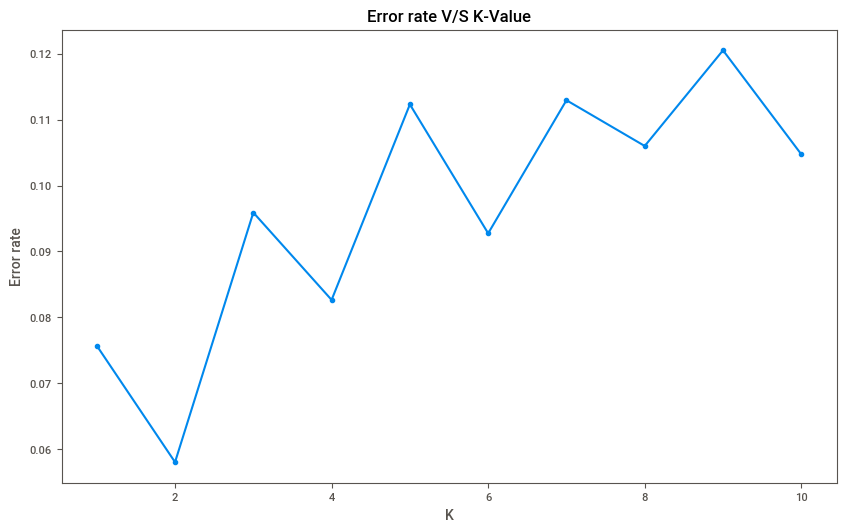

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,marker='o')
plt.title('Error rate V/S K-Value')
plt.xlabel('K')
plt.ylabel('Error rate')

In [53]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [55]:
acc=accuracy_score(y_test,y_pred)
acc

0.8876971608832808

In [56]:
recall=recall_score(y_test,y_pred)
recall

0.9950920245398773

In [57]:
f1=f1_score(y_test,y_pred)
f1

0.9011111111111112

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87       770
           1       0.82      1.00      0.90       815

    accuracy                           0.89      1585
   macro avg       0.91      0.88      0.89      1585
weighted avg       0.91      0.89      0.89      1585



KNN Model is giving accuracy of 89%

## Bagging Classifier Model

In [59]:
## using Bagging
from sklearn.ensemble import BaggingClassifier
model_bagg1=BaggingClassifier(base_estimator=model2,n_estimators=10) ## model objet creation

model_bagg1.fit(x_train,y_train) ## fitting the model
y_hat_bagg=model_bagg1.predict(x_test) ## getting the prediction

In [63]:
f1_score(y_test,y_hat_bagg,average='binary') 

0.9046291132180703

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_bagg1,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.62301339 0.60042183 0.59417168 0.61406045 0.6130918 ]
Cross validation Score: 0.6089518296611006
Std : 0.010316768361247468


In [64]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_hat_bagg)
score

0.8891044538283802

In [65]:
print(classification_report(y_test,y_hat_bagg))

              precision    recall  f1-score   support

           0       0.99      0.78      0.88       770
           1       0.83      1.00      0.90       815

    accuracy                           0.89      1585
   macro avg       0.91      0.89      0.89      1585
weighted avg       0.91      0.89      0.89      1585



Bagging Classifier Model is giving accuracy of 89%

## Random Forest Model

In [66]:
## model4 creation
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(n_estimators=100)
model4.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
y_predict=model4.predict(x_test)
y_predict

array([1, 0, 1, ..., 1, 0, 0])

In [68]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       770
           1       0.97      0.95      0.96       815

    accuracy                           0.96      1585
   macro avg       0.96      0.96      0.96      1585
weighted avg       0.96      0.96      0.96      1585



In [69]:
f_Score=f1_score(y_test,y_predict)
f_Score

0.9592592592592593

In [70]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model4,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.92085808 0.8901563  0.9144884  0.92166416 0.91610282]
Cross validation Score: 0.9126539513523522
Std : 0.011574937751580694


Random Forest Model is giving accuracy of 96%

## SVM Model

In [67]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [68]:
y_pred=svc.predict(x_test)

In [69]:
acc=accuracy_score(y_test,y_pred)
acc

0.9211356466876972

In [70]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       770
           1       0.93      0.91      0.92       815

    accuracy                           0.92      1585
   macro avg       0.92      0.92      0.92      1585
weighted avg       0.92      0.92      0.92      1585



In [71]:
f_Score=f1_score(y_test,y_pred)
f_Score

0.9226006191950465

## Decision Tree Model

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [74]:
acc=accuracy_score(y_test,y_pred)
acc

0.910410094637224

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       770
           1       0.90      0.93      0.91       815

    accuracy                           0.91      1585
   macro avg       0.91      0.91      0.91      1585
weighted avg       0.91      0.91      0.91      1585



In [76]:
f_Score=f1_score(y_test,y_pred)
f_Score

0.914043583535109

## Naive Bayes Model

In [77]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB(alpha=0.01)
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

In [78]:
acc=accuracy_score(y_test,y_pred)
acc

0.6996845425867508

In [79]:
recall=recall_score(y_test,y_pred)
recall

0.6638036809815951

In [80]:
f1=f1_score(y_test,y_pred)
f1

0.6944801026957639

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       770
           1       0.73      0.66      0.69       815

    accuracy                           0.70      1585
   macro avg       0.70      0.70      0.70      1585
weighted avg       0.70      0.70      0.70      1585



## Gradiant Boosting Classifier Model

In [83]:
## importing the 5th model library

from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(x_train,y_train) ## fitting the data
y_gbm=gbm.predict(x_test)


In [84]:
acc=accuracy_score(y_test,y_gbm)
acc

0.9394321766561514

In [85]:
recall=recall_score(y_test,y_pred)
recall

0.6638036809815951

In [86]:
f1=f1_score(y_test,y_pred)
f1

0.6944801026957639

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       770
           1       0.73      0.66      0.69       815

    accuracy                           0.70      1585
   macro avg       0.70      0.70      0.70      1585
weighted avg       0.70      0.70      0.70      1585



### Hyperparameter Tuning for the Best Model

In [88]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=1000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 40, num=9)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=model4, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

### XGB Model

In [73]:
from xgboost import XGBClassifier
model6=XGBClassifier(objective='binary:logistic')
model6.fit(x_train,y_train)
y_hatxgb=model6.predict(x_test)

[21:24:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [75]:
acc=accuracy_score(y_test,y_hatxgb)
acc

0.9703470031545741

In [77]:
print(classification_report(y_test,y_hatxgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       770
           1       0.98      0.96      0.97       815

    accuracy                           0.97      1585
   macro avg       0.97      0.97      0.97      1585
weighted avg       0.97      0.97      0.97      1585



In [78]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_hatxgb)
score

0.9706636921360848

In [80]:
pd.crosstab(y_test,y_hatxgb)

col_0,0,1
Churn_Flag,,
0,756,14
1,33,782


XGB Model is giving accuracy of 97%

### ANN Model

In [27]:
from sklearn.neural_network import MLPClassifier
#hidden_layer_sizes=(50,3)3layer each have50 neurons,learning_rate_init=0.1,max_iter=100,
                      
modelann = MLPClassifier(hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2) ## model object creation max_iter=Stopping parameter
modelann.fit(x_train,y_train) ## training the data
y_predict_proba = modelann.predict_proba(x_test) ## predicting the probability
## probability of class
y_predictann = modelann.predict(x_test)
y_train_predictann = modelann.predict(x_train)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_train_predictann))
print("Test accuracy :",accuracy_score(y_test,y_predictann))

Train accuracy : 0.9520277733943506
Test accuracy : 0.9192429022082019


In [29]:
pd.crosstab(y_test,y_predict10)

col_0,0,1
Churn_Flag,,
0,687,83
1,45,770


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predictann))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       770
           1       0.90      0.94      0.92       815

    accuracy                           0.92      1585
   macro avg       0.92      0.92      0.92      1585
weighted avg       0.92      0.92      0.92      1585



### Creating churn risk scores that can indicate who is likely to leave, and using that information to drive retention campaigns

In [32]:
import statsmodels.formula.api as smf

In [33]:
data2.head()

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,International_calls,International_Charge,CustServ_Calls,Churn_Flag
0,16,128,415,0,1,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,35,107,415,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,31,137,415,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,35,84,408,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,36,75,415,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [34]:
data2.columns

Index(['State', 'Account_Length', 'Area_Code', 'International_Plan',
       'VMail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'International_calls',
       'International_Charge', 'CustServ_Calls', 'Churn_Flag'],
      dtype='object')

In [39]:
logit_model= smf.ols('Churn_Flag ~ Account_Length + Area_Code + International_Plan+ VMail_Plan + Day_Calls + Day_Charge + Eve_Calls + Eve_Charge + Night_Calls + Night_Charge + International_calls + International_Charge + CustServ_Calls', data = data2).fit()

In [40]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Churn_Flag   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     77.53
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          1.06e-186
Time:                        21:01:44   Log-Likelihood:                -1235.7
No. Observations:                4617   AIC:                             2499.
Df Residuals:                    4603   BIC:                             2590.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.4559      0.074     -6.142      0.000      -0.601      -0.310
Account_Length           0.0001      0.000      1.055      0.291      -0.000       0.000
Area_Code             2.238e-06      0.000      0.020      0.984      -0.000       0.000
International_Plan       0.2986      0.016     18.874      0.000       0.268       0.330
VMail_Plan              -0.0889      0.011     -8.440      0.000      -0.110      -0.068
Day_Calls                0.0003      0.000      1.146      0.252      -0.000       0.001
Day_Charge               0.0076      0.001     14.883      0.000       0.007       0.009
Eve_Calls            -7.061e-05      0.000     -0.300      0.764      -0.001       0.000
Eve_Charge               0.0073      0.001      6.768      0.000       0.005       0.009
Night_Calls             -0.0001      0.000     -0.616      0.538      -0.001       0.000
Night_Charge             0.0081      0.002      3.967      0.000       0.004       0.012
International_calls     -0.0065      0.002     -3.406      0.001      -0.010      -0.003
International_Charge     0.0295      0.006      4.703      0.000       0.017       0.042
CustServ_Calls           0.0574      0.004     16.089      0.000       0.050       0.064
==============================================================================
Omnibus:                     1178.052   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2388.312
Skew:                           1.536   Prob(JB):                         0.00
Kurtosis:                       4.725   Cond. No.                     7.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
data2['Churn_Risk_Score'] = logit_model.predict(data2)

In [42]:
data2.head()

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,International_calls,International_Charge,CustServ_Calls,Churn_Flag,Churn_Risk_Score
0,16,128,415,0,1,110,45.07,99,16.78,91,11.01,3,2.70,1,0,0.153156
1,35,107,415,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1,0,0.050745
2,31,137,415,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,0.083029
3,35,84,408,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,0.472172
4,36,75,415,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,0.466319


In [44]:
data2['Churn_Pred'] = 0

In [45]:
data2.loc[data2.Churn_Risk_Score>=0.5] = 1
data2.head()

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,International_calls,International_Charge,CustServ_Calls,Churn_Flag,Churn_Risk_Score,Churn_Pred
0,16,128,415,0,1,110,45.07,99,16.78,91,11.01,3,2.70,1,0,0.153156,0
1,35,107,415,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1,0,0.050745,0
2,31,137,415,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,0.083029,0
3,35,84,408,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,0.472172,0
4,36,75,415,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,0.466319,0


In [47]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(data2.Churn_Flag,data2.Churn_Pred))
print(classification_report(data2.Churn_Flag,data2.Churn_Pred))

0.8726445743989604
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3919
           1       1.00      0.16      0.27       698

    accuracy                           0.87      4617
   macro avg       0.93      0.58      0.60      4617
weighted avg       0.89      0.87      0.83      4617



In [48]:
pd.crosstab(data2.Churn_Flag,data2.Churn_Pred)

Churn_Pred,0,1
Churn_Flag,,
0,3919,0
1,588,110


## more features should be recorded such as :age,gender,payment methods,other plan(Internet plan),issue type that require customer service to solve,that problem have been solved or not ,contract type.